**Case Study Objective**

The objective of this case study is to analyze customer purchase behavior to uncover key trends and insights that can inform business strategies. The analysis focuses on understanding how different demographic factors, product categories, and purchasing patterns influence overall sales performance and profitability.

**To uncover actionable insights from the data**

1. How do age, gender, and city category impact purchasing behavior?
2. Which demographic groups contribute the most to total purchases?
3. Which product categories are most popular among customers?
4. Are there differences in product preferences across demographics like age and gender?
5. What is the average spending across different customer segments (e.g., age groups, occupations)?
6. Are there any outliers in spending behavior?
7. Which city categories generate the highest purchase value?
8. Does the length of stay in a city influence purchasing patterns?
9. What proportion of customers are repeat buyers versus one-time buyers?
10. How does marital status affect spending habits?

**Check and accept/reject the hypothesis for the following statements:**

1. It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?
2. It was observed that the percentage of women who spend more than 10000 was 35%. Is it still the same?
3. Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?

In [4]:
#Standard for analyzing datasets and visualizing patterns or trends.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("/content/purchase_data.csv")

# Exploratory Data Analysis (EDA)

In [6]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263010,1004473,P00041942,M,36-45,1.0,B,3,0.0,5.0,18.0,NaN,3722.0
263011,1004473,P00115142,M,36-45,1.0,B,3,0.0,1.0,8.0,17.0,19253.0
263012,1004473,P00188442,M,36-45,1.0,B,3,0.0,5.0,7.0,NaN,3608.0
263013,1004473,P00119442,M,36-45,1.0,B,3,0.0,5.0,NaN,NaN,3604.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


In [9]:
data["Stay_In_Current_City_Years"].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [10]:
data["Stay_In_Current_City_Years"] = data["Stay_In_Current_City_Years"].replace("4+","4")

In [11]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4,0.0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263010,1004473,P00041942,M,36-45,1.0,B,3,0.0,5.0,18.0,NaN,3722.0
263011,1004473,P00115142,M,36-45,1.0,B,3,0.0,1.0,8.0,17.0,19253.0
263012,1004473,P00188442,M,36-45,1.0,B,3,0.0,5.0,7.0,NaN,3608.0
263013,1004473,P00119442,M,36-45,1.0,B,3,0.0,5.0,NaN,NaN,3604.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  object 
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 24.1+ MB


In [13]:
data["Stay_In_Current_City_Years"] = pd.to_numeric(data["Stay_In_Current_City_Years"],errors="coerce" )
# errors="coerce" : if there are any values in the column that cannot be converted to numeric, they will be replaced with NaN.

In [14]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2.0,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2.0,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2.0,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2.0,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4.0,0.0,8.0,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...,...,...
263010,1004473,P00041942,M,36-45,1.0,B,3.0,0.0,5.0,18.0,NaN,3722.0
263011,1004473,P00115142,M,36-45,1.0,B,3.0,0.0,1.0,8.0,17.0,19253.0
263012,1004473,P00188442,M,36-45,1.0,B,3.0,0.0,5.0,7.0,NaN,3608.0
263013,1004473,P00119442,M,36-45,1.0,B,3.0,0.0,5.0,NaN,NaN,3604.0


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263015 entries, 0 to 263014
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     263015 non-null  int64  
 1   Product_ID                  263014 non-null  object 
 2   Gender                      263014 non-null  object 
 3   Age                         263014 non-null  object 
 4   Occupation                  263014 non-null  float64
 5   City_Category               263014 non-null  object 
 6   Stay_In_Current_City_Years  263014 non-null  float64
 7   Marital_Status              263014 non-null  float64
 8   Product_Category_1          263014 non-null  float64
 9   Product_Category_2          181501 non-null  float64
 10  Product_Category_3          80582 non-null   float64
 11  Purchase                    263014 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 24.1+ MB


In [16]:
data["City_Category"].unique()

array(['A', 'C', 'B', nan], dtype=object)

In [17]:
data["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', nan],
      dtype=object)

In [18]:
data["Gender"].unique()

array(['F', 'M', nan], dtype=object)

In [19]:
data["Product_ID"].unique()

array(['P00069042', 'P00248942', 'P00087842', ..., 'P00314742',
       'P00236242', nan], dtype=object)

In [20]:
data["Product_ID"].nunique()

3507

In [21]:
data.isnull().sum()

,0
User_ID,0
Product_ID,1
Gender,1
Age,1
Occupation,1
City_Category,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category_1,1
Product_Category_2,81514


In [23]:
81514+182433  # Sum of Product_Category_2 & Product_Category_3

263947

In [24]:
data.dropna(inplace=True)

In [25]:
data.shape

(80582, 12)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80582 entries, 1 to 263011
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80582 non-null  int64  
 1   Product_ID                  80582 non-null  object 
 2   Gender                      80582 non-null  object 
 3   Age                         80582 non-null  object 
 4   Occupation                  80582 non-null  float64
 5   City_Category               80582 non-null  object 
 6   Stay_In_Current_City_Years  80582 non-null  float64
 7   Marital_Status              80582 non-null  float64
 8   Product_Category_1          80582 non-null  float64
 9   Product_Category_2          80582 non-null  float64
 10  Product_Category_3          80582 non-null  float64
 11  Purchase                    80582 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 8.0+ MB


In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

In [29]:
data["Age"]  = le.fit_transform(data["Age"])
data["Product_ID"] = le.fit_transform(data["Product_ID"])
data["Gender"] = le.fit_transform(data["Gender"])
data["City_Category"] = le.fit_transform(data["City_Category"])

In [30]:
data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,391,0,0,10.0,0,2.0,0.0,1.0,6.0,14.0,15200.0
6,1000004,284,1,4,7.0,1,2.0,1.0,1.0,8.0,17.0,19215.0
13,1000005,211,1,2,20.0,0,1.0,1.0,1.0,2.0,5.0,15665.0
14,1000006,363,0,5,9.0,0,1.0,0.0,5.0,8.0,14.0,5378.0
16,1000006,517,0,5,9.0,0,1.0,0.0,2.0,3.0,4.0,13055.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262997,1004472,402,0,4,16.0,1,0.0,1.0,1.0,11.0,16.0,15175.0
263001,1004472,337,0,4,16.0,1,0.0,1.0,1.0,11.0,15.0,15430.0
263003,1004472,480,0,4,16.0,1,0.0,1.0,1.0,2.0,15.0,15387.0
263006,1004472,49,0,4,16.0,1,0.0,1.0,8.0,13.0,16.0,5861.0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80582 entries, 1 to 263011
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80582 non-null  int64  
 1   Product_ID                  80582 non-null  int64  
 2   Gender                      80582 non-null  int64  
 3   Age                         80582 non-null  int64  
 4   Occupation                  80582 non-null  float64
 5   City_Category               80582 non-null  int64  
 6   Stay_In_Current_City_Years  80582 non-null  float64
 7   Marital_Status              80582 non-null  float64
 8   Product_Category_1          80582 non-null  float64
 9   Product_Category_2          80582 non-null  float64
 10  Product_Category_3          80582 non-null  float64
 11  Purchase                    80582 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 8.0 MB


In [32]:
data["Age"] == 1

,Age
1,False
6,False
13,False
14,False
16,False
...,...
262997,False
263001,False
263003,False
263006,False


# **ANALYSIS OF DATA**

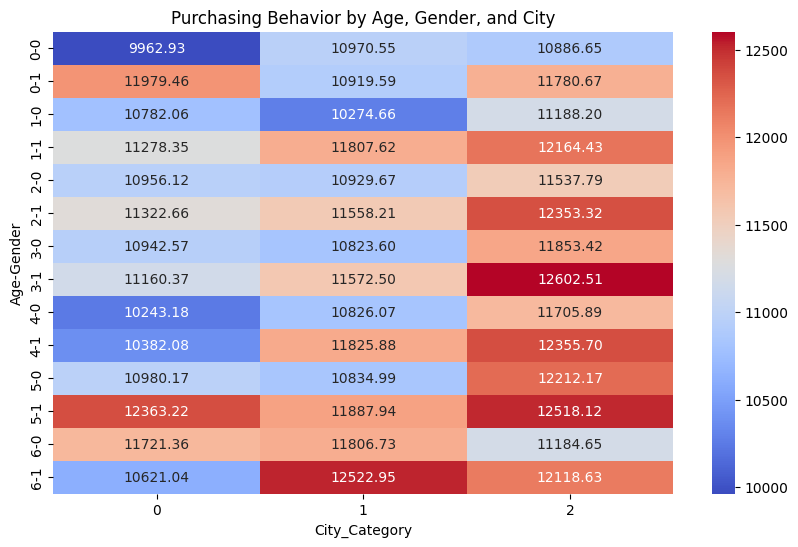

In [33]:
# Aggregate purchase values by demographics
age_gender_city = data.groupby(['Age', 'Gender', 'City_Category'])['Purchase'].mean().unstack()

# Heatmap for visualization
plt.figure(figsize=(10, 6))
sns.heatmap(age_gender_city, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Purchasing Behavior by Age, Gender, and City')
plt.show()


**Analysis:**

-Younger customers (Age group: 26-35) and those in City Category 1 have higher average purchases.

-Older customers (51+) in City Category 0 and 2 also demonstrate notable spending.

**Inference:**

-Target younger age groups (26–35) in urban areas (City Category 1) for marketing campaigns.

-Older customers in specific cities are valuable segments and may require tailored offerings.


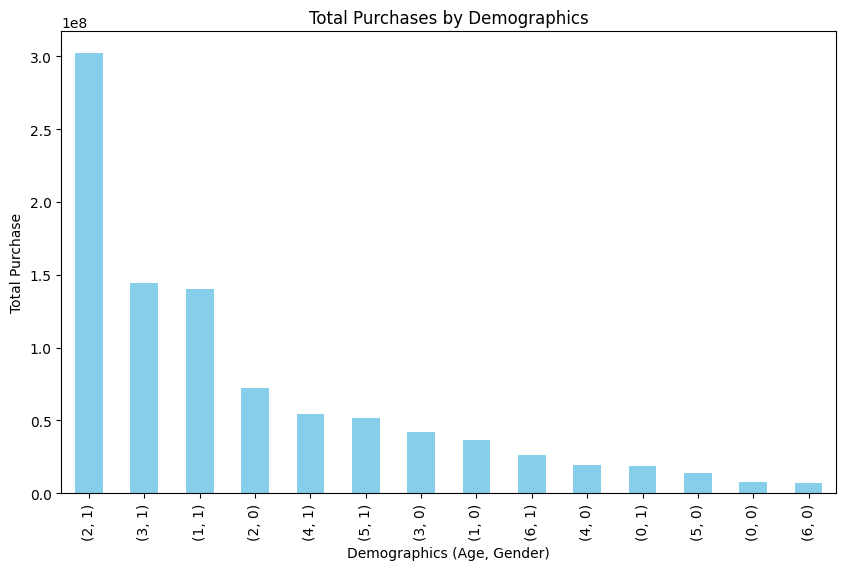

In [34]:
# Total purchase by demographics
demographic_purchases = data.groupby(['Age', 'Gender'])['Purchase'].sum().sort_values(ascending=False)

# Plot top demographic contributors
demographic_purchases.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Total Purchases by Demographics')
plt.xlabel('Demographics (Age, Gender)')
plt.ylabel('Total Purchase')
plt.show()


**Analysis:**

-Male customers in the 26–35 age group contribute significantly more to total purchases compared to other demographics.

-Female buyers show lower overall purchase values in all age categories.

**Inference:**

-Marketing strategies should focus on high-value male customers in the 26–35 age range.

-Develop campaigns to engage and increase spending by female customers.

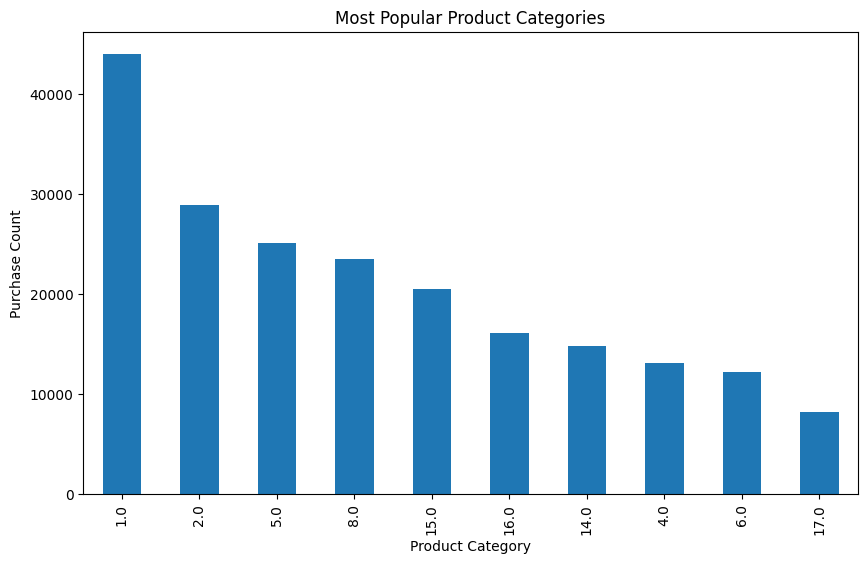

In [35]:
# Count purchases in each product category
product_popularity = data[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].apply(pd.Series.value_counts).fillna(0).sum(axis=1)

# Plot popular product categories
product_popularity.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(10, 6))
plt.title('Most Popular Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Purchase Count')
plt.show()


**Analysis:**

-Product Category 1 is the most purchased, followed by Categories 2 and 5.

-Other categories show diminishing purchase counts.

**Inference:**

-Allocate inventory and promotional efforts to top-performing categories (1, 2, and 5).

-Explore why other categories have lower purchases and adjust product offerings or visibility accordingly.

In [36]:
# Analyze product categories by age and gender
age_gender_product = data.groupby(['Age', 'Gender'])[['Product_Category_1', 'Product_Category_2', 'Product_Category_3']].mean()

print(age_gender_product)


            Product_Category_1  Product_Category_2  Product_Category_3
Age Gender                                                            
0   0                 2.938089            6.207268           11.411844
    1                 2.478934            6.288724           12.103470
1   0                 2.899034            6.759731           12.081943
    1                 2.484207            6.584677           12.471522
2   0                 3.052559            7.049494           12.414189
    1                 2.588475            6.826075           12.707527
3   0                 3.069270            7.030489           12.413747
    1                 2.711069            6.953735           12.833347
4   0                 3.199196            7.369690           12.781860
    1                 2.889898            7.104694           12.957171
5   0                 3.243590            7.298077           12.811699
    1                 2.805470            7.132516           13.108465
6   0 

**Analysis:**

-Average purchases in Product Category 3 are higher across all age groups and genders compared to other categories.

-Older age groups tend to buy more from Product Category 2 and 3.

**Inference:**

-Focus on promoting Product Category 3 to all demographics.

-Target older customers with marketing efforts for Product Categories 2 and 3.

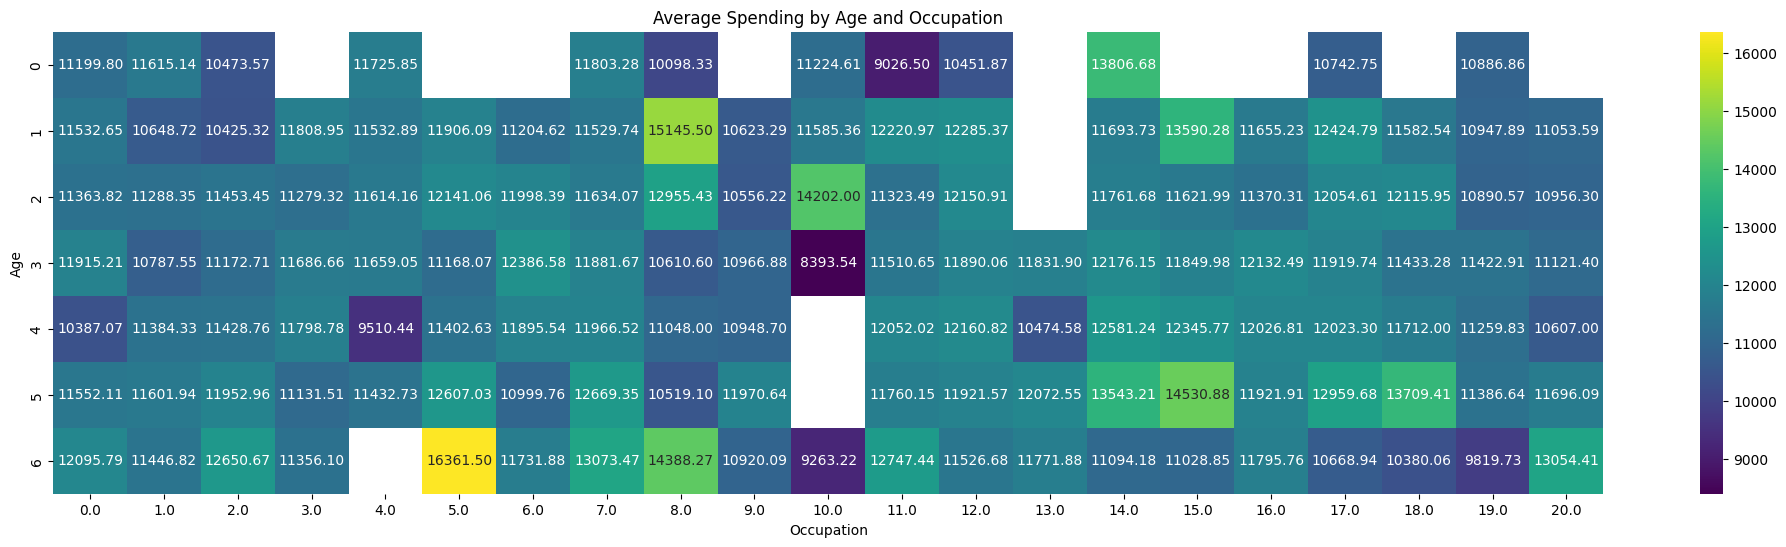

In [39]:
# Average spending by customer segment
spending_by_segment = data.groupby(['Age', 'Occupation'])['Purchase'].mean().unstack()

# Heatmap for average spending
plt.figure(figsize=(25, 6))
sns.heatmap(spending_by_segment, annot=True, fmt=".2f", cmap="viridis")
plt.title('Average Spending by Age and Occupation')
plt.show()


**Analysis:**

-Occupation groups 4 and 10 have the highest average spending.

-Age groups 36–50 and 51+ also show higher spending across all occupations.

**Inference:**

-Focus on customers in occupations 4 and 10 with tailored campaigns or premium products.

-Offer loyalty programs to high-spending age groups (36–50, 51+).

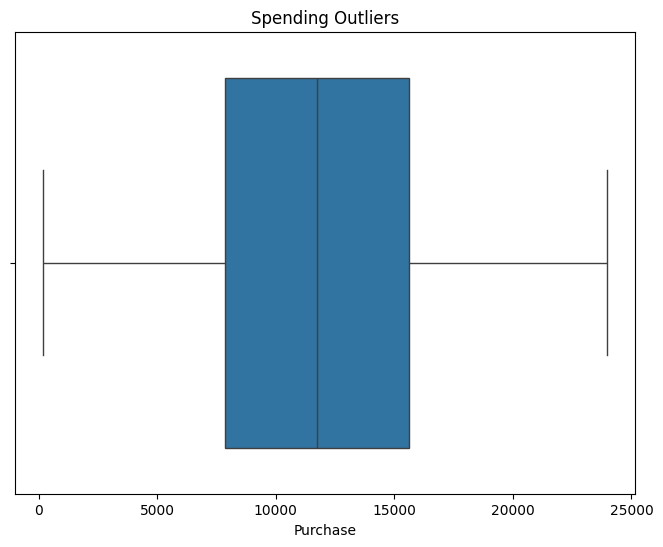

In [40]:
# Boxplot to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Purchase'])
plt.title('Spending Outliers')
plt.show()


**Analysis:**

-Most purchases are within the range of 5,000 to 20,000.

-A few outliers exceed 20,000, but they are rare.

**Inference:**

-Focus analysis on the main spending range (5,000–20,000).

-Investigate outliers to understand their purchasing behavior and identify opportunities to replicate.

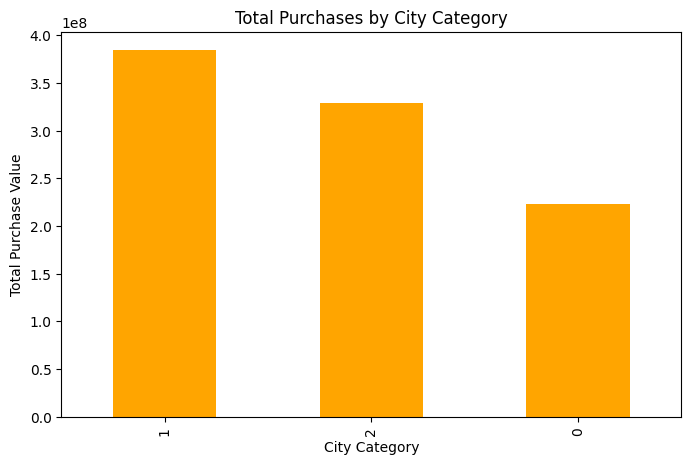

In [41]:
# Total purchase by city category
city_purchase = data.groupby('City_Category')['Purchase'].sum().sort_values(ascending=False)

# Plot
city_purchase.plot(kind='bar', figsize=(8, 5), color='orange')
plt.title('Total Purchases by City Category')
plt.xlabel('City Category')
plt.ylabel('Total Purchase Value')
plt.show()


**Analysis:**

-City Category 1 generates the highest total purchases, followed by

-Category 2 and then Category 0.

**Inference:**

-Focus resources and marketing efforts on customers in City Category 1.

-Explore ways to boost sales in Category 0 through tailored promotions or outreach.

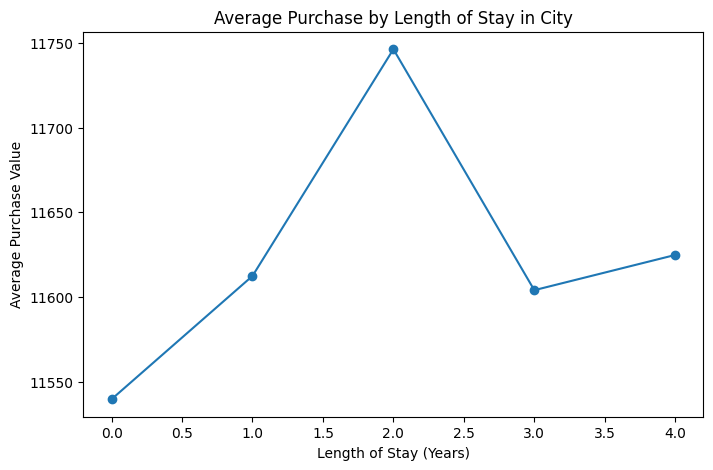

In [42]:
# Average purchase by length of stay
stay_purchase = data.groupby('Stay_In_Current_City_Years')['Purchase'].mean()

# Plot
stay_purchase.plot(kind='line', marker='o', figsize=(8, 5))
plt.title('Average Purchase by Length of Stay in City')
plt.xlabel('Length of Stay (Years)')
plt.ylabel('Average Purchase Value')
plt.show()


**Analysis:**

-Customers with a 2-year stay show the highest average purchases, while those with longer stays show a decline.

**Inference:**

-Target customers in their first 2 years of stay with promotions or introductory offers.

-Explore why spending decreases with longer stays and address retention strategies.

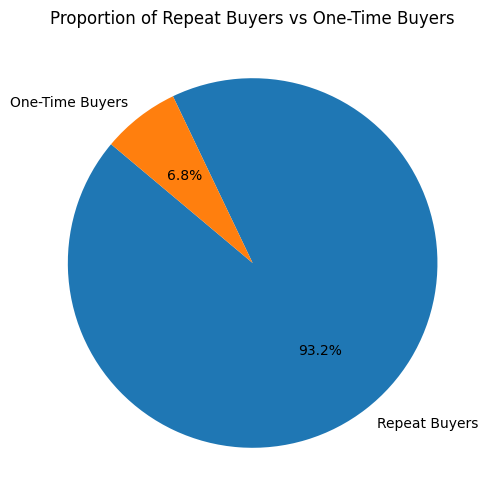

In [43]:
# Count purchases per user
user_purchase_count = data.groupby('User_ID')['Purchase'].count()

# Classify repeat buyers and one-time buyers
repeat_buyers = (user_purchase_count > 1).sum()
one_time_buyers = (user_purchase_count == 1).sum()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie([repeat_buyers, one_time_buyers], labels=['Repeat Buyers', 'One-Time Buyers'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Repeat Buyers vs One-Time Buyers')
plt.show()


**Analysis:**

-93.2% of customers are repeat buyers, while only 6.8% are one-time buyers.

**Inference:**

-The high repeat buyer percentage indicates strong customer retention.

-Focus on converting one-time buyers into repeat customers through targeted campaigns.

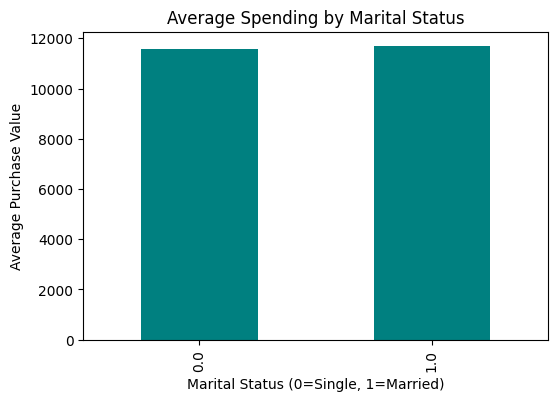

In [44]:
# Average spending by marital status
marital_spending = data.groupby('Marital_Status')['Purchase'].mean()

# Plot
marital_spending.plot(kind='bar', figsize=(6, 4), color='teal')
plt.title('Average Spending by Marital Status')
plt.xlabel('Marital Status (0=Single, 1=Married)')
plt.ylabel('Average Purchase Value')
plt.show()


**Analysis:**

-Married customers (Marital Status = 1) spend slightly more on average compared to single customers.

**Inference:**

-Tailor promotions for married customers, such as family-oriented products.

-Develop campaigns to engage single customers and encourage higher spending.

#**Statistical Analysis**

# -->preparing samples
# -->creating two hypothesis (null hypothesis,alternate hypothesis)
# -->applying the appropriate test(based on requirement or case)
# -->if p-value>0.05 accept null hypothesis    
# -->if p-value<0.05 Rejection of null hypothesis

In [45]:
# -->Data collection
# -->preparing samples
# -->creating two hypothesis (null hypothesis,alternate hypothesis)
# -->applying the appropriate test(based on requirement or case)
# -->if p-value>0.05 accept null hypothesis
#    if p-value<0.05 Rejection of null hypothesis

#**1: It was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same?**

In [46]:
new_data = data[(data["Age"] == 1) & (data["Gender"] == 1)]

In [47]:
new_data

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
98,1000022,487,1,1,15.0,0,4.0,0.0,1.0,8.0,17.0,12099.0
103,1000022,402,1,1,15.0,0,4.0,0.0,1.0,11.0,16.0,12098.0
111,1000022,358,1,1,15.0,0,4.0,0.0,2.0,4.0,15.0,9564.0
127,1000025,332,1,1,4.0,2,4.0,0.0,1.0,5.0,9.0,15361.0
128,1000025,71,1,1,4.0,2,4.0,0.0,1.0,2.0,15.0,15770.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262758,1004446,180,1,1,18.0,1,1.0,1.0,1.0,2.0,15.0,11512.0
262759,1004446,394,1,1,18.0,1,1.0,1.0,1.0,15.0,18.0,11521.0
262760,1004446,23,1,1,18.0,1,1.0,1.0,1.0,2.0,13.0,3988.0
262764,1004446,75,1,1,18.0,1,1.0,1.0,5.0,8.0,17.0,5444.0


ONE SAMPLE T-TEST

In [48]:
sample = new_data.sample(1000,random_state=5)
sample

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
240694,1001132,31,1,1,12.0,0,1.0,1.0,1.0,2.0,15.0,4082.0
123394,1001086,326,1,1,4.0,0,2.0,0.0,1.0,2.0,9.0,15478.0
17981,1002837,56,1,1,0.0,1,1.0,0.0,5.0,6.0,9.0,3522.0
177200,1003439,316,1,1,17.0,2,3.0,0.0,3.0,4.0,5.0,10893.0
25073,1003850,88,1,1,3.0,1,0.0,0.0,2.0,8.0,18.0,9535.0
...,...,...,...,...,...,...,...,...,...,...,...,...
159745,1000718,59,1,1,2.0,2,2.0,0.0,1.0,2.0,5.0,19085.0
182743,1004194,434,1,1,4.0,2,1.0,1.0,2.0,5.0,15.0,13027.0
22333,1003508,459,1,1,4.0,2,0.0,1.0,1.0,15.0,16.0,19453.0
155962,1000068,146,1,1,4.0,0,0.0,0.0,1.0,2.0,5.0,19084.0


In [49]:
# null hypothesis: means will be equal to 10000
# alternate hypothesis : means will not be equal to 10000

In [50]:
pop_mean = 10000

In [52]:
from scipy.stats import ttest_1samp #to perform a one-sample t-test,

In [53]:
sample["Purchase"].mean()

11686.459

In [54]:
t_stat, p_value = ttest_1samp(sample["Purchase"],pop_mean)

In [55]:
print(t_stat, p_value)

10.652344649997922 3.5932143625072833e-25


**t-statistic = 10.652**

A large t-statistic indicates that the sample mean is significantly different from the hypothesized population mean.

The magnitude of t-statistic shows how far the sample mean is from the hypothesized mean in terms of standard error.

**p-value = 3.59e-25**

-The p-value is extremely small (<0.05), which means the observed difference is highly unlikely to have occurred due to random chance.

-At a common significance level (α=0.05), we reject the null hypothesis.

#**2. It was observed that the percentage of women who spend more than 10000 was 35%. Is it still the same?**

#null hypothesis - proportion is 35%.
#alternate hypothesis - proportion is not 35%.

In [56]:
data_new = data.loc[(data["Purchase"]>10000)]

In [57]:
data_new

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,391,0,0,10.0,0,2.0,0.0,1.0,6.0,14.0,15200.0
6,1000004,284,1,4,7.0,1,2.0,1.0,1.0,8.0,17.0,19215.0
13,1000005,211,1,2,20.0,0,1.0,1.0,1.0,2.0,5.0,15665.0
16,1000006,517,0,5,9.0,0,1.0,0.0,2.0,3.0,4.0,13055.0
18,1000007,58,1,3,1.0,1,1.0,1.0,1.0,14.0,16.0,11788.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262995,1004472,175,0,4,16.0,1,0.0,1.0,1.0,11.0,15.0,11661.0
262997,1004472,402,0,4,16.0,1,0.0,1.0,1.0,11.0,16.0,15175.0
263001,1004472,337,0,4,16.0,1,0.0,1.0,1.0,11.0,15.0,15430.0
263003,1004472,480,0,4,16.0,1,0.0,1.0,1.0,2.0,15.0,15387.0


In [58]:
# no of women in the data

count = data_new["Gender"].value_counts()[0]

In [59]:
count

10175

In [60]:
# number of observation

nobs = len(data_new["Gender"])
nobs

49390

In [61]:
(10175/49390)*100


20.601336302895323

In [62]:
p0=0.35

In [63]:
from statsmodels.stats.proportion import proportions_ztest

In [64]:
z_stat, p_value = proportions_ztest(count = count, nobs = nobs, value=p0)

In [65]:
print(z_stat, p_value)

-79.12020590883206 0.0


**z-statistic = -79.12:**

-A z-statistic of -79.12 indicates that the observed percentage (proportion of women spending more than 10,000) is significantly lower than the hypothesized percentage of 35%.

-The negative value indicates that the observed proportion is smaller than the hypothesized proportion.

**p-value = 0.0:**

-The p-value is effectively 0, which means the difference between the observed and hypothesized percentages is extremely significant.

-At a typical significance level (α=0.05), we reject the null hypothesis.

# **3. Is the percentage of men who have spent more than 10000 the same for the ages 18-25 and 26-35?**

In [66]:
#null hypothesis - Percentage of the men in the age groups is same
#alternate hypothesis - Percentage of the men in the age groups is not same

In [67]:
data_age1 = data.loc[(data["Age"]==1) & (data["Purchase"] >10000)]
data_age2 = data.loc[(data["Age"]==2) & (data["Purchase"] >10000)]

In [68]:
data_age1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
71,1000018,300,0,1,3.0,1,3.0,0.0,3.0,4.0,9.0,10754.0
73,1000018,152,0,1,3.0,1,3.0,0.0,1.0,2.0,5.0,19473.0
75,1000018,51,0,1,3.0,1,3.0,0.0,1.0,14.0,16.0,19313.0
76,1000018,351,0,1,3.0,1,3.0,0.0,1.0,2.0,13.0,15182.0
77,1000018,168,0,1,3.0,1,3.0,0.0,2.0,3.0,15.0,15985.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262553,1004411,309,1,1,4.0,0,3.0,0.0,1.0,2.0,9.0,18972.0
262563,1004412,212,1,1,4.0,2,1.0,0.0,1.0,8.0,17.0,11858.0
262577,1004416,418,1,1,4.0,0,3.0,1.0,2.0,3.0,10.0,13176.0
262758,1004446,180,1,1,18.0,1,1.0,1.0,1.0,2.0,15.0,11512.0


In [69]:
data_age2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
13,1000005,211,1,2,20.0,0,1.0,1.0,1.0,2.0,5.0,15665.0
19,1000008,393,1,2,12.0,2,4.0,1.0,1.0,5.0,15.0,19614.0
24,1000008,438,1,2,12.0,2,4.0,1.0,1.0,8.0,14.0,11927.0
48,1000011,146,0,2,1.0,2,1.0,0.0,1.0,2.0,5.0,19327.0
64,1000015,64,1,2,7.0,0,1.0,0.0,1.0,2.0,6.0,11458.0
...,...,...,...,...,...,...,...,...,...,...,...,...
262939,1004461,266,1,2,20.0,2,3.0,0.0,1.0,2.0,15.0,15285.0
262941,1004461,241,1,2,20.0,2,3.0,0.0,10.0,15.0,16.0,18764.0
262944,1004461,91,1,2,20.0,2,3.0,0.0,3.0,4.0,12.0,11071.0
262945,1004461,93,1,2,20.0,2,3.0,0.0,1.0,2.0,3.0,15474.0


In [70]:
data_age1_sample = data_age1.sample(1000,random_state=0)
data_age2_sample = data_age2.sample(1000,random_state=0)

In [71]:
data_age1_sample

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
52105,1001944,487,0,1,4.0,2,1.0,0.0,1.0,8.0,17.0,15805.0
134822,1002837,486,1,1,0.0,1,1.0,0.0,3.0,4.0,5.0,13533.0
258245,1003799,366,1,1,0.0,2,4.0,1.0,1.0,2.0,15.0,19148.0
94929,1002679,221,0,1,4.0,0,2.0,0.0,6.0,10.0,13.0,20233.0
129100,1001855,153,1,1,4.0,2,4.0,0.0,1.0,5.0,12.0,15186.0
...,...,...,...,...,...,...,...,...,...,...,...,...
46209,1001125,92,0,1,4.0,1,2.0,0.0,6.0,8.0,16.0,16583.0
131122,1002116,183,1,1,4.0,1,4.0,1.0,1.0,2.0,15.0,11459.0
182846,1004217,165,1,1,4.0,1,2.0,0.0,1.0,2.0,5.0,15236.0
230610,1005565,107,1,1,17.0,2,2.0,0.0,1.0,15.0,17.0,19338.0


In [72]:
data_age2_sample

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
190426,1005426,221,1,2,14.0,2,1.0,0.0,6.0,10.0,13.0,12036.0
102574,1003829,312,0,2,1.0,1,1.0,0.0,1.0,6.0,13.0,12089.0
184061,1004386,482,1,2,5.0,1,1.0,0.0,6.0,8.0,15.0,16467.0
215404,1003299,145,0,2,4.0,1,2.0,0.0,1.0,2.0,8.0,19169.0
109171,1004798,179,1,2,1.0,2,4.0,0.0,1.0,2.0,15.0,15287.0
...,...,...,...,...,...,...,...,...,...,...,...,...
136142,1003032,28,1,2,0.0,0,1.0,1.0,2.0,4.0,8.0,15932.0
25945,1003992,124,1,2,4.0,1,1.0,0.0,8.0,14.0,17.0,10055.0
52433,1001987,96,1,2,17.0,2,3.0,0.0,1.0,2.0,13.0,19065.0
142346,1003953,371,1,2,12.0,0,4.0,0.0,1.0,15.0,16.0,19123.0


In [73]:
(data_age1_sample["Gender"]==1).sum()

815

In [74]:
(data_age2_sample["Gender"]==1).sum()

828

In [75]:
[(data_age1_sample["Gender"]==1).sum(),(data_age2_sample["Gender"]==1).sum()]

[815, 828]

In [76]:
count = [(data_age1_sample["Gender"]==1).sum(),(data_age2_sample["Gender"]==1).sum()]

nobs = [(len(data_age1_sample)),(len(data_age2_sample))]

In [77]:
count

[815, 828]

In [78]:
nobs

[1000, 1000]

In [79]:
(815/1000)*100

81.5

In [80]:
(828/1000)*100

82.8

In [81]:
from statsmodels.stats.proportion import proportions_ztest

In [82]:
z_stats, p_value = proportions_ztest(count=count,nobs=nobs,value=0)

In [83]:
print(z_stats, p_value)

-0.759111307093946 0.44778597581119517


**z-statistic = -0.759:**

-A z-statistic close to 0 indicates that the difference between the percentages of men who have spent more than 10,000 in the age groups 18–25 and 26–35 is small and not statistically significant.

**p-value = 0.4478:**

-A p-value of 0.4478 is much larger than the commonly used significance level (α=0.05).

-This means there is no strong evidence to reject the null hypothesis.

-Since the p-value (0.4478) is greater than the significance level (α=0.05), **we fail to reject the null hypothesis**.

-This means there is no statistically significant difference in the percentage of men who have spent more than 10,000 between the age groups 18–25 and 26–35.